<a href="https://colab.research.google.com/github/RainliFu/tensorflow-udacity/blob/master/Cats_vs_Dogs_with_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install -U tensorflow tensorflow_datasets numpy matplotlib 

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.14.0)
Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.2.0)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.0)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.1.1)


In [0]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_dogs_filterted.zip',origin=_URL,extract=True)

In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [0]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

val_cats_dir = os.path.join(validation_dir,'cats')
val_dogs_dir = os.path.join(validation_dir,'dogs')

In [29]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_val = num_cats_val + num_dogs_val

print('total train number is {} total validation number is {}'.format(total_train,total_val))

total train number is 2000 total validation number is 1000


In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150 

In [0]:
def plot_image(images):
  plt.figure(figsize=(10,10))
  for index,image in enumerate(images):
    plt.subplot(1,5,index+1)
    plt.imshow(image)
  plt.tight_layout()
  plt.show()

In [32]:
image_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                        directory=train_dir,
                        shuffle=True,
                        target_size=(IMG_SHAPE,IMG_SHAPE))
val_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                        directory=validation_dir,
                        shuffle=False,
                        target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


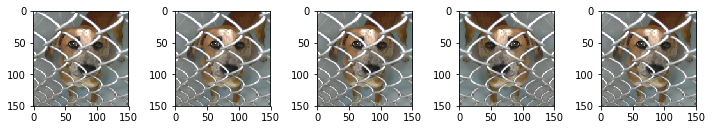

In [33]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)

In [34]:
image_gen = ImageDataGenerator(rescale=1./255,rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                        directory=train_dir,
                        shuffle=True,
                        target_size=(IMG_SHAPE,IMG_SHAPE))
val_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                        directory=validation_dir,
                        shuffle=False,
                        target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


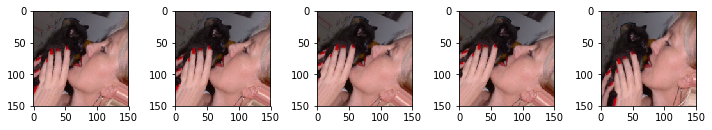

In [35]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)

In [36]:
image_gen = ImageDataGenerator(rescale=1./255,zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                        directory=train_dir,
                        shuffle=True,
                        target_size=(IMG_SHAPE,IMG_SHAPE))
val_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                        directory=validation_dir,
                        shuffle=False,
                        target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


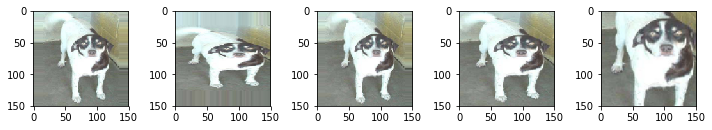

In [37]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)

In [38]:
image_gen_train = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    rescale=1./255)
train_data_gen = image_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE,IMG_SHAPE),
    class_mode='binary')

Found 2000 images belonging to 2 classes.


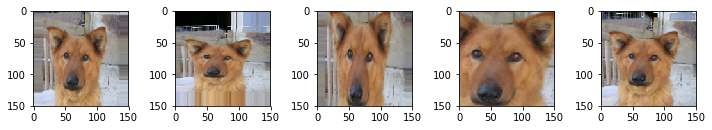

In [39]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_image(augmented_images)

In [0]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
    
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(2,activation='softmax')
    ])

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [43]:
EPOCHS = 100

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_SHAPE,IMG_SHAPE),
    class_mode='binary')
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val/float(BATCH_SIZE)))
)

Found 1000 images belonging to 2 classes.
Epoch 1/100
20/20 [==============================] - 22s 1s/step - loss: 0.7211 - acc: 0.4905 - val_loss: 0.6926 - val_acc: 0.5010
Epoch 2/100
20/20 [==============================] - 19s 950ms/step - loss: 0.6926 - acc: 0.5285 - val_loss: 0.6893 - val_acc: 0.5360
Epoch 3/100
20/20 [==============================] - 19s 946ms/step - loss: 0.6928 - acc: 0.5270 - val_loss: 0.6860 - val_acc: 0.5230
Epoch 4/100
20/20 [==============================] - 19s 955ms/step - loss: 0.6854 - acc: 0.5635 - val_loss: 0.6962 - val_acc: 0.5090
Epoch 5/100
20/20 [==============================] - 19s 943ms/step - loss: 0.6687 - acc: 0.5770 - val_loss: 0.6294 - val_acc: 0.6370
Epoch 6/100
20/20 [==============================] - 19s 955ms/step - loss: 0.6459 - acc: 0.6280 - val_loss: 0.6049 - val_acc: 0.6730
Epoch 7/100
20/20 [==============================] - 19s 946ms/step - loss: 0.6288 - acc: 0.6470 - val_loss: 0.6901 - val_acc: 0.5730
Epoch 8/100
20/20 [====

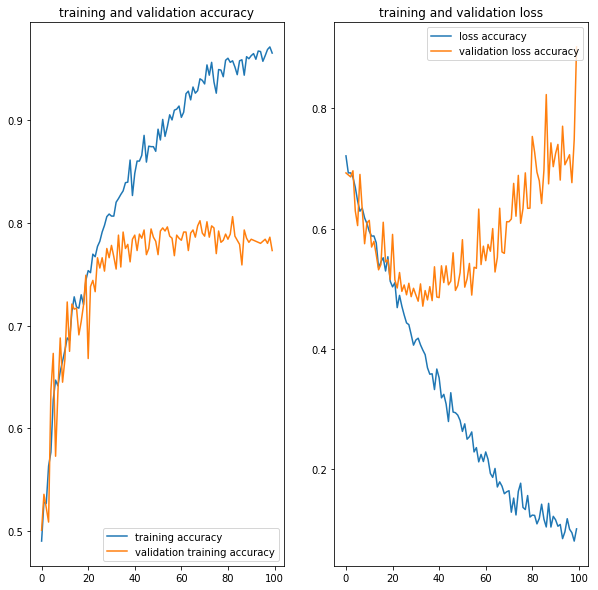

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation training accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(122)
plt.plot(epochs_range,loss,label='loss accuracy')
plt.plot(epochs_range,val_loss,label='validation loss accuracy')
plt.legend(loc='upper right')
plt.title('training and validation loss')

plt.show()

In [0]:
model.save('cats_and_dogs.pb')

In [50]:
!ls -al -h

total 40M
drwxr-xr-x 1 root root 4.0K Aug 23 03:39 .
drwxr-xr-x 1 root root 4.0K Aug 23 02:10 ..
-rw-r--r-- 1 root root  40M Aug 23 03:39 cats_and_dogs.pb
drwxr-xr-x 1 root root 4.0K Aug 20 16:13 .config
drwxr-xr-x 1 root root 4.0K Aug 20 16:13 sample_data
